<a href="https://colab.research.google.com/github/tungdang24/big-data-recommendation-project/blob/main/Movielens_EDA_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Cleaning**

In [4]:
# Import packages for calcs & visualisations
import numpy as np
import pandas as pd
import category_encoders as ce
# Data visualization
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load the data
movies = pd.read_csv('/content/MovieLens/movies.dat', sep="::" , header=None, names=["MovieID","Title","Genres"],engine='python',encoding='ISO-8859-1')
ratings = pd.read_csv("/content/MovieLens/ratings.dat" , sep='::', header=None, names =['UserID','MovieID','Rating','Timestamp'] , engine='python', encoding='ISO-8859-1')
users = pd.read_csv("/content/MovieLens/users.dat", sep='::' , header=None, names =['UserID','Gender','Age','Occupation','Zip-code'] , engine='python', encoding='ISO-8859-1')

In [10]:
# Merge the data across the 3 files
tmpDS = pd.merge(movies, ratings, on='MovieID')
finalDF = pd.merge(tmpDS, users, on='UserID')
finalDF.head(10)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768,F,18,3,95825
6,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994,M,1,10,48073
7,1,Toy Story (1995),Animation|Children's|Comedy,21,3,978139347,M,18,16,99353
8,1,Toy Story (1995),Animation|Children's|Comedy,23,4,978463614,M,35,0,90049
9,1,Toy Story (1995),Animation|Children's|Comedy,26,3,978130703,M,25,7,23112


In [11]:
# Display summarised data re dataframe
finalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


**2. Missing Data**

<Axes: >

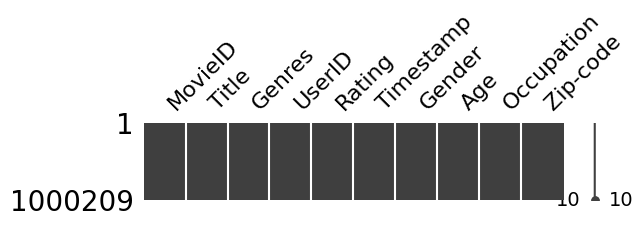

In [15]:
# Visualise missing data
missingno.matrix(finalDF, figsize = (6,1))

In [16]:
# Number of missing data points per column
missing_values_count = finalDF.isnull().sum()

# The no of missing points in the columns
missing_values_count[0:11]

,0
MovieID,0
Title,0
Genres,0
UserID,0
Rating,0
Timestamp,0
Gender,0
Age,0
Occupation,0
Zip-code,0


**3. Data Stories and Visualisations**

Text(0.5, 1.0, 'User Age Histogram')

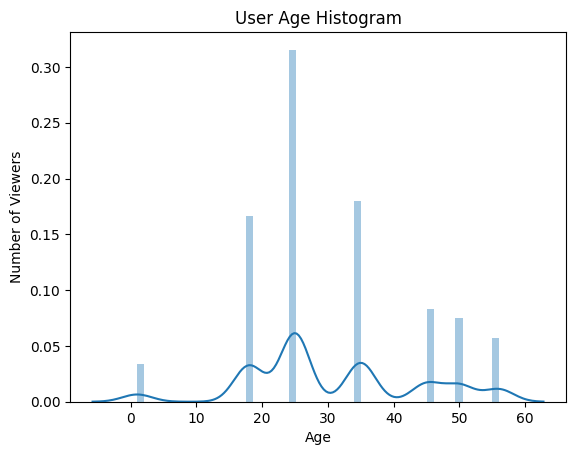

In [17]:
# Seaborn plot of user age
sns.distplot(users['Age'])
plt.ylabel('Number of Viewers')
plt.xlabel('Age')
plt.title('User Age Histogram')

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64


Text(0.5, 1.0, 'Overall Rating by Viewers')

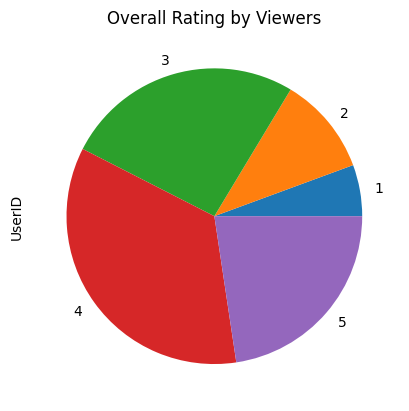

In [18]:
# No of viewers per rating score
print(finalDF.groupby('Rating')['UserID'].count())
finalDF.groupby('Rating')['UserID'].count().plot(kind="pie")
plt.title('Overall Rating by Viewers')

Text(0.5, 1.0, 'Overall Rating by Viewers')

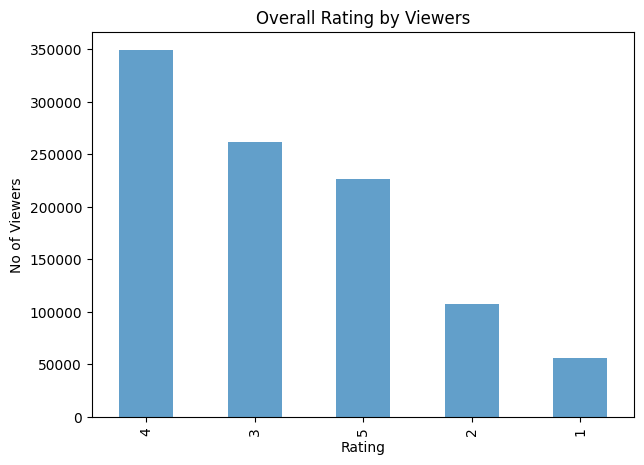

In [19]:
# Descending ratings by number of viewers/ users
finalDF['Rating'].value_counts().plot(kind='bar', alpha=0.7, figsize=(7,5))
plt.ylabel('No of Viewers')
plt.xlabel('Rating')
plt.title('Overall Rating by Viewers')

In [20]:
# Similar movies to assist sequel identification
movies[movies.Title.str.contains("Toy Story")]

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
3045,3114,Toy Story 2 (1999),Animation|Children's|Comedy


Rating
1     16
2     61
3    345
4    835
5    820
Name: UserID, dtype: int64


Text(0.5, 1.0, 'Ratings by Movie Title (Toy Story)')

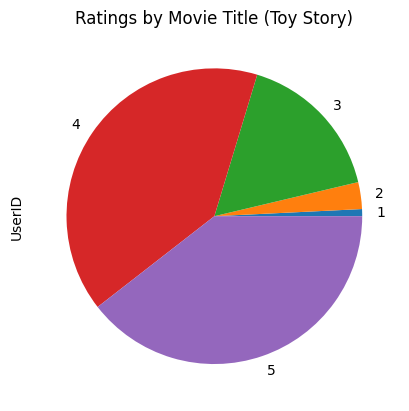

In [21]:
# groupby ratings per movie title level
print(finalDF[finalDF.Title == "Toy Story (1995)"].groupby("Rating")['UserID'].count())
finalDF[finalDF.Title == "Toy Story (1995)"].groupby("Rating")['UserID'].count().plot(kind="pie")
plt.title('Ratings by Movie Title (Toy Story)')

In [22]:
# Number of viewers at different age levels per title
print(finalDF[finalDF["Title"] == "Toy Story (1995)"].groupby(by=["Age"])['Age'].count())

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: Age, dtype: int64


Text(0, 0.5, 'Number of Viewers')

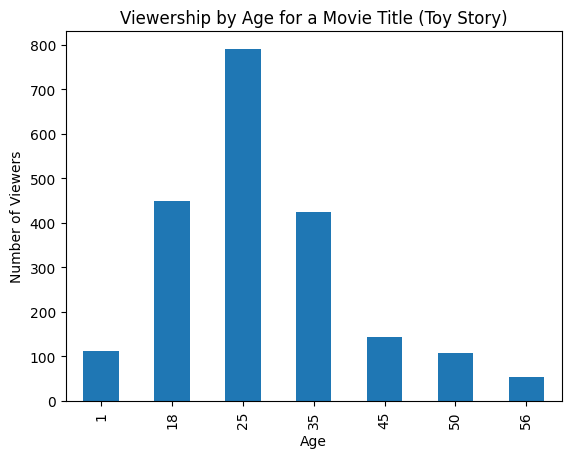

In [23]:
# Visualise viewers age levels per movie title
finalDF[finalDF["Title"] == "Toy Story (1995)"].groupby(by=["Age"])['Age'].count().plot(kind="bar")
plt.title('Viewership by Age for a Movie Title (Toy Story)')
plt.ylabel('Number of Viewers')

In [24]:
# nlargest - sorted in descending order displaying first 25
title = finalDF.groupby('Title')
print(title['Rating'].count().nlargest(25))

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

Text(0.5, 1.0, 'Top 25 Movies by Viewership Rating')

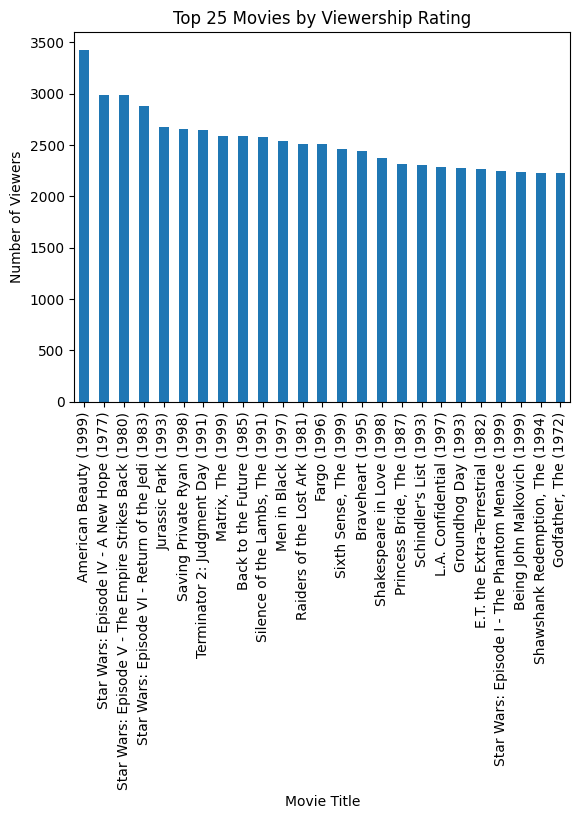

In [25]:
# Visualise the top 25 from data above
title['Rating'].count().nlargest(25).plot(kind="bar")
plt.xlabel('Movie Title')
plt.ylabel('Number of Viewers')
plt.title('Top 25 Movies by Viewership Rating')

In [26]:
# groupby Ratings by Movie Title
print(finalDF[finalDF.UserID == 2696].groupby("Rating")['MovieID'].count())

Rating
1     2
2     3
3     3
4    11
5     1
Name: MovieID, dtype: int64


Text(0.5, 1.0, 'Visualise Ratings at a Viewer level')

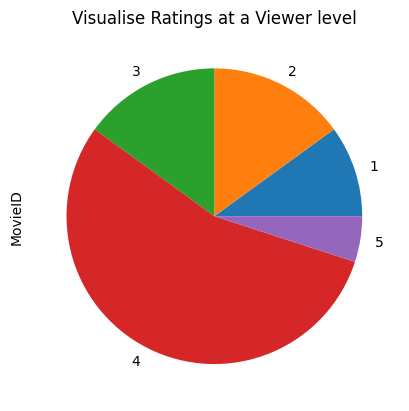

In [27]:
# Visualise groupby at a user level UserID = 2696
finalDF[finalDF.UserID == 2696].groupby("Rating")['MovieID'].count().plot(kind='pie')
plt.title('Visualise Ratings at a Viewer level')

In [28]:
# Dataset creation
dataset = finalDF.iloc[:, [0,7,8,4]].head(500)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MovieID     500 non-null    int64
 1   Age         500 non-null    int64
 2   Occupation  500 non-null    int64
 3   Rating      500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB
